In [ ]:
Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps: 
    a. Load in a pre-trained CNN model trained on a large dataset 
    b. Freeze parameters (weights) in model's lower convolutional layers 
    c. Add custom classifier with several layers of trainable parameters to model 
    d. Train classifier layers on training data available for task 
    e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
# Step a: Load in a pre-trained CNN model trained on a large dataset
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the VGG16 model (pre-trained on ImageNet)
# exclude the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# Step b: Freeze parameters (weights) in lower layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Step c: Add custom classifier (fully connected layers)
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes (CIFAR-10)
])

In [6]:
# Step d: Compile and train classifier layers
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 747s 475ms/step - accuracy: 0.4767 - loss: 1.4882 - val_accuracy: 0.5541 - val_loss: 1.2753
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 749s 479ms/step - accuracy: 0.5435 - loss: 1.3013 - val_accuracy: 0.5721 - val_loss: 1.2215
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 628s 402ms/step - accuracy: 0.5642 - loss: 1.2489 - val_accuracy: 0.5842 - val_loss: 1.1828
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 598s 382ms/step - accuracy: 0.5758 - loss: 1.2140 - val_accuracy: 0.5969 - val_loss: 1.1562
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 608s 389ms/step - accuracy: 0.5870 - loss: 1.1873 - val_accuracy: 0.5950 - val_loss: 1.1551


313/313 ━━━━━━━━━━━━━━━━━━━━ 7496s 24s/step - accuracy: 0.5950 - loss: 1.1551

Test Accuracy: 0.5950000286102295


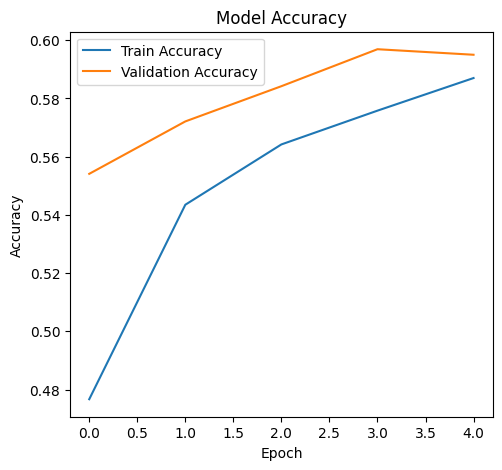

In [8]:
# Step e: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()